___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Метод опорных векторов (англ. SVM - support vector machine) 

**Замечание: в этом примере мы исследуем сам алгоритм, поэтому мы пропустим масштабирование и разбиение на обучающий и тестовый набор данных. Вместо этого мы посмотрим различные параметры, с помощью которых можно менять метод SVM (проще всего показать результаты с помощью визуализации).**

[Ссылка на отличную статью по SVM (англ.)](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)


## Метод опорных векторов -  классификация

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

Мы будем изучать следующий сценарий - медицинское исследование, в котором мышам с наличием вируса дают различные дозы двух лекарств. Через две недели смотрят, остался ли ещё вирус или нет. Цель - создать модель классификации, которая по двум измерениям дозы лекарств будет предсказывать, есть или нет вирус у мыши. 

Вы увидите, что группы хорошо отделимы друг от друга - данные специально подобраны таким образом, чтобы исследовать поведение модели SVM с различными параметрами.

In [2]:
df = pd.read_csv("../DATA/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

## Классы

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

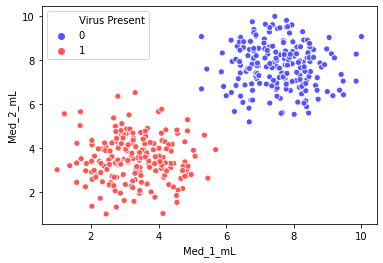

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

## Разделяющая гиперплоскость

Цель SVM - создать наилучшую разделяющую гиперплоскость. В двумерном пространстве это просто линия.

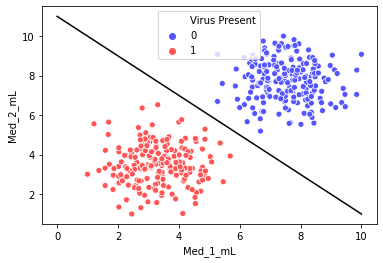

In [6]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# Мы хотим автоматически создать разделяющую гиперплоскость (в двумерном случае - линия)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

## Метод опорных векторов (SVM - Support Vector Machine)

In [7]:
from sklearn.svm import SVC # Support Vector Classifier

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

**Замечание: в этом примере мы будем исследовать сам алгоритм, так что пока мы пропустим масштабирование данных и разбиение на обучающий и тестовый наборы данных.**

In [9]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [10]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [11]:
# Импортируем из вспомогательного .py-файла
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

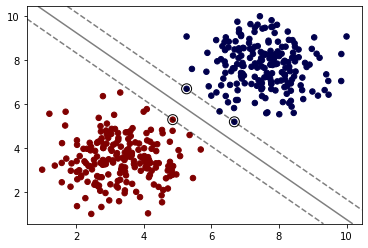

In [12]:
plot_svm_boundary(model,X,y)

## Гиперпараметры

### C

Параметр регуляризации. Сила регуляризации **обратно** пропорциональна величине C. Параметр должен быть строго положительным. В качестве штрафа применяется штраф "squared l2 penalty".

In [13]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

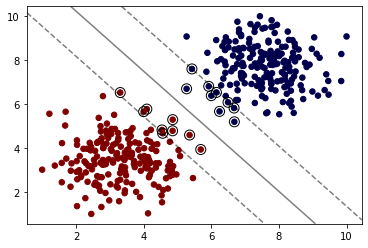

In [14]:
plot_svm_boundary(model,X,y)

### Ядро (Kernel)

[Выбираем ядро](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


Обучение модели SVM с использованием ядра "Radial Basis Function (RBF) kernel" предполагает наличие двух параметров: C и gamma. Параметр C является общим для всех ядер SVM, с его помощью настраивается баланс между неправильной классификацией обучающих примеров и простотой разделяющей поверхности. Маленькие значения C делают поверхность гладкой. Большие значения C стараются правильно классифицировать все обучающие примеры. Параметр gamma определяет то, какое влияние может оказывать отдельный обучающий пример. Чем больше значение gamma, тем ближе должны быть другие примеры, чтобы они тоже влияли на результат.

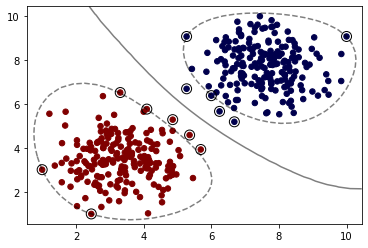

In [15]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

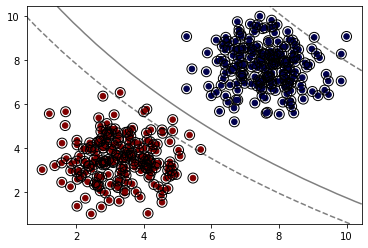

In [16]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### degree (только для полиноминальных ядер)

Степень полиноминальной функции ядра ('poly').
Игнорируется всеми другими ядрами.

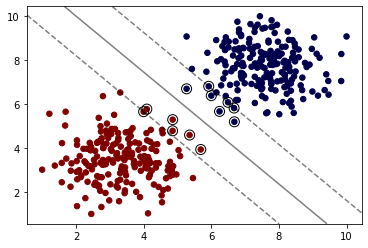

In [17]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

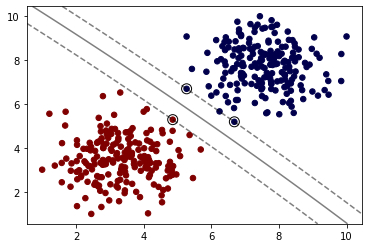

In [18]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} или float, по умолчанию='scale'  
    Коэффициент ядра для 'rbf', 'poly' или 'sigmoid'.

    - если ``gamma='scale'`` (по умолчанию), то в качестве значения гамма используется
      1 / (n_features * X.var()),
    - если 'auto', то используется значение 1 / n_features.

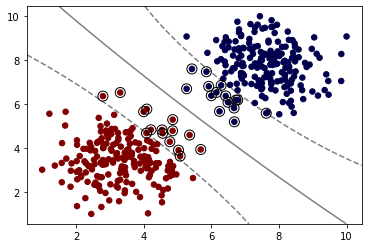

In [19]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Поиск по сетке

Имейте ввиду, что в этом простом примере классы легко отделялись друг от друга. Это значит, что различные варианты модели могут давать 100% точность, и поиск по сетке может быть излишним.

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [22]:
# Опять же, мы не делаем разбиение на обучающий и тестовый наборы данных
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [23]:
# точность 100% (как и ожидалось)
grid.best_score_

1.0

In [24]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

Здесь мы вспомнили процесс поиска по сетке - это пригодится в реальных примерах, например в самостоятельном упражнении в конце этого раздела, где Вы будете разбивать данные на обучающий и тестовый наборы данных, и вычислять метрики оценки модели.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


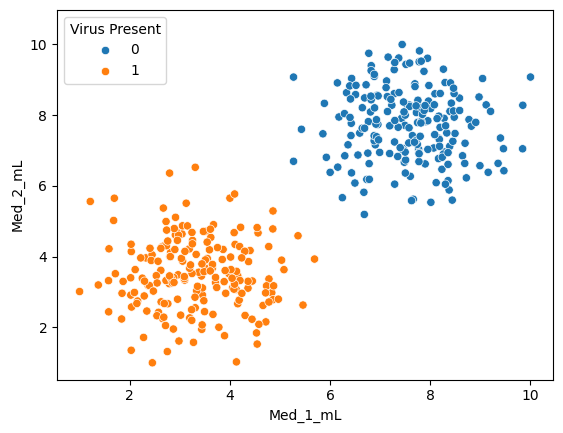

In [10]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df)

# line
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b

plt.plot(x, y, 'black')

In [11]:
from sklearn.svm import SVC

In [12]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [13]:
y = df['Virus Present']

In [15]:
X = df.drop('Virus Present', axis=1)

In [16]:
model = SVC(kernel='linear', C=1000)

In [17]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [18]:
from svm_margin_plot import plot_svm_boundary

C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


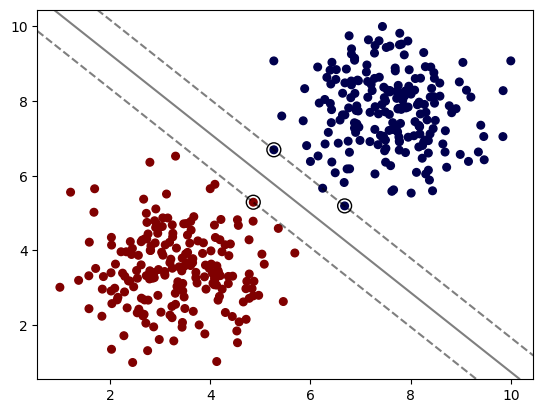

In [19]:
plot_svm_boundary(model, X, y)

C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


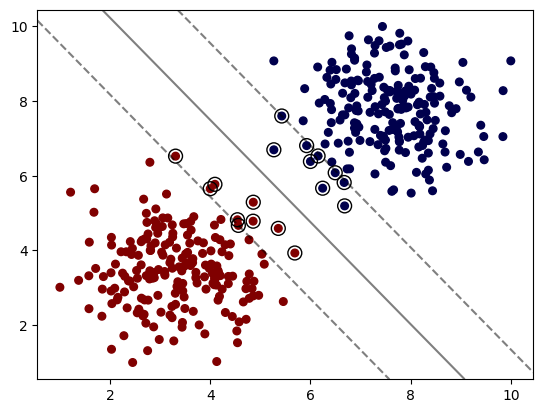

In [25]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


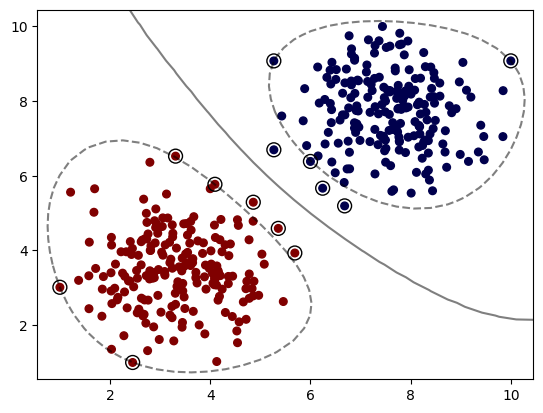

In [49]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


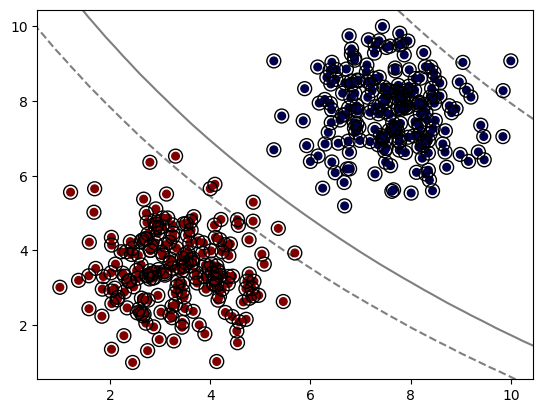

In [52]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model, X, y)

C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


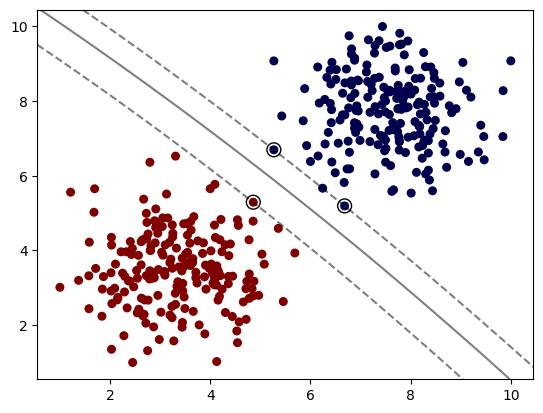

In [59]:
model = SVC(kernel='poly', degree=4, C=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
svm = SVC()

In [62]:
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [63]:
grid = GridSearchCV(svm, param_grid)

In [64]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [65]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}